100%|██████████████████████████████████████████████████████████████████████████████████| 96/96 [00:42<00:00,  2.27it/s]


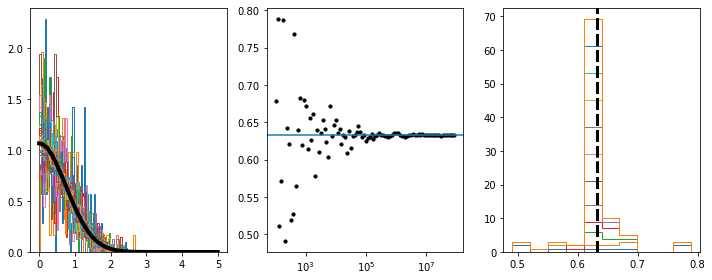

In [123]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats

sigma = 0.75
pxfx = lambda x: x**3 * np.exp(-x**2/2/sigma**2)
# Check that \int_{0}^{+\infty}{pxfx} == 2 \sigma**4
x = np.linspace(0, 10, 1000)
#plt.plot(x, pxfx(x))

p = lambda x: 2*stats.norm(loc=0, scale=sigma).pdf(x) #/ np.sqrt(2*np.pi*sigma**2)
f = lambda x: x**3 * np.sqrt(2 * np.pi * sigma**2) * 0.5
fig, axs = plt.subplots(1, 3, tight_layout=True, figsize=(10, 4))

axs[0].plot(x[x<5], p(x[x<5]), lw=4, c='k', zorder=0)
#plt.plot(-x, p(-x))

N = np.arange(2, 8, 0.125/2)#, dtype=int)
from tqdm import tqdm
I = []#np.zeros(len(N))

for n in tqdm(N):
    xi = abs( stats.norm(0, sigma).rvs( int( 10**n )) )
    INT = 1/int( 10**n ) * np.sum( f(xi) )
    axs[0].hist(xi, histtype='step', density=True, bins=50, zorder=-1)
    axs[1].scatter(10**n, INT, c='k', s=10)
    I.append(INT)
    # print(I, 2*sigma**4, I-2*sigma**4)
axs[1].axhline(2*sigma**4)
axs[1].set_xscale('log')
# print(len(N))
for j in range(8, len(N)+1, 8):
    #print(j)
    axs[2].hist(I[:j], bins=10, histtype='step')
    axs[2].axvline(2*sigma**4, c='k', ls='--', lw=3)